### Ans1)

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns

In [58]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [62]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Observations:
- All the the columns are numerical(int,float). Which is good to work with ML models.
- There is no null value, which is good and there's no need to use any imputation techinque
- There min BloodPressure levle is 0 which looks like outlier in common statistics about the data.
- There is imbalance in dataset. There big difference in the values of 0 and 1.

### Ans2)

<AxesSubplot: >

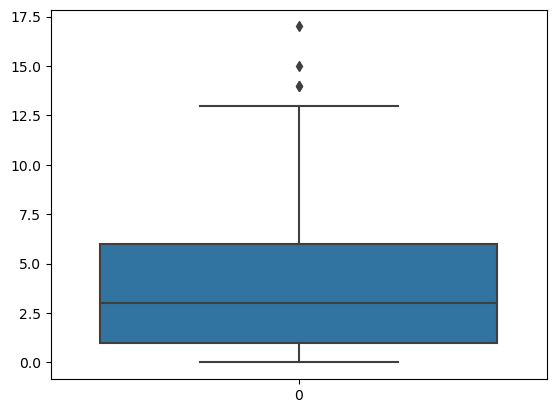

In [63]:
## finding outliers
sns.boxplot(df['Pregnancies'])

In [64]:
from scipy import stats

outlier=np.abs(stats.zscore(df['Pregnancies']))
print(outlier)

0      0.639947
1      0.844885
2      1.233880
3      0.844885
4      1.141852
         ...   
763    1.827813
764    0.547919
765    0.342981
766    0.844885
767    0.844885
Name: Pregnancies, Length: 768, dtype: float64


In [65]:
print(np.where(outlier>3))

(array([ 88, 159, 298, 455]),)


In [66]:
df.drop(88,inplace=True)
df.drop(159,inplace=True)
df.drop(298,inplace=True)
df.drop(455,inplace=True)

df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

### Ans3)

In [67]:
y=df.pop('Outcome')
X=df

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Ans4)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid={
    'max_features':['auto', 'sqrt' , 'log2'],
    'ccp_alpha':[0.1, .01, .001],
    'criterion':['gini','entropy'],
    'max_depth':[5,6,7,8,9]
}

clf = DecisionTreeClassifier(random_state=1000)
grid_search= GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1000),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [70]:
best_params=grid_search.best_estimator_
best_params

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto',
                       random_state=1000)

In [71]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                             max_features='auto',random_state=1000)

In [72]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1000)

In [73]:
y_pred=clf.predict(X_test)

### Ans5)

In [74]:
from sklearn.metrics import classification_report

target_names=['Non_diabetic', 'Diabetic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non_diabetic       0.78      0.90      0.84        51
    Diabetic       0.72      0.50      0.59        26

    accuracy                           0.77        77
   macro avg       0.75      0.70      0.71        77
weighted avg       0.76      0.77      0.75        77



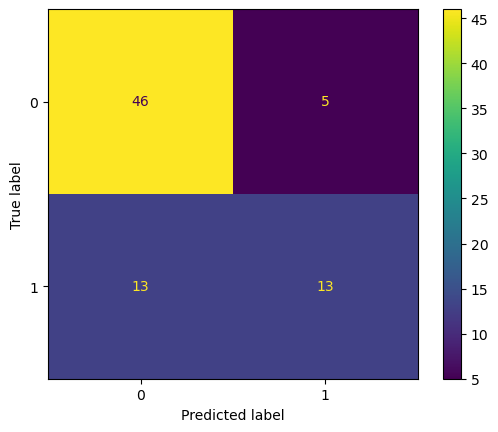

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

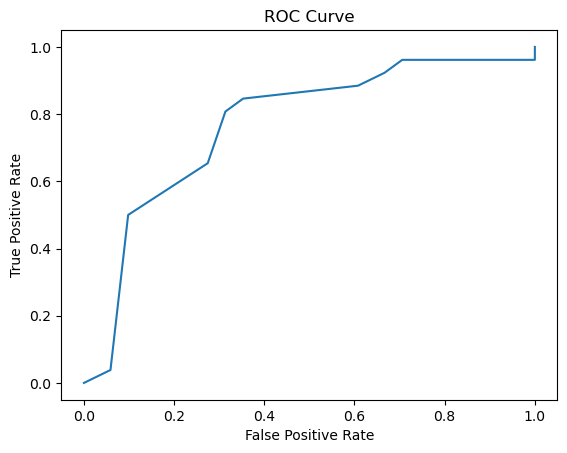

In [76]:
from sklearn.metrics import roc_curve

y_proba= clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Remarks on the results

The model is performing very poorly on new data, as shown in the charts.

- The classification report provides a summary of the model's overall performance. The recall score for class 1 is extremely poor, as would be predicted given the class imbalance (this is also supported by a glance at the confusion matrix).

- The confusion matrix reveals that the model performs comparably worse on class 0 than class 1 but not sufficiently well to be regarded as reliable when it comes to predicting class 1 cases (again, due to the imbalance).

- The ROC curve once more demonstrates that the model's real positive rate is just marginally satisfactory.

### Ans6)

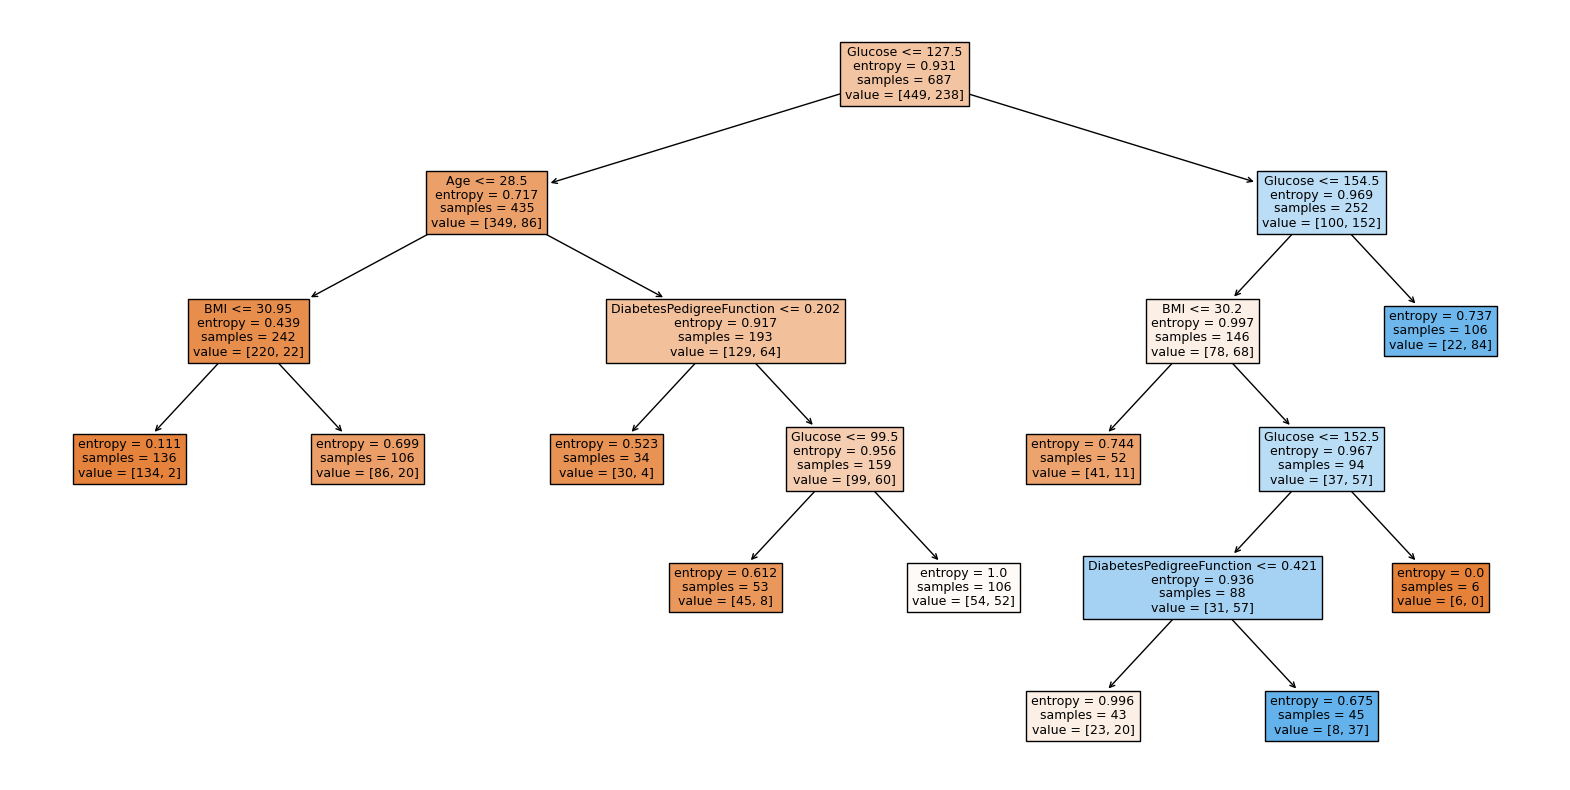

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

In [80]:
importance_scores = clf.feature_importances_
mst_impt_indices = np.argsort(importance_scores)[::-1][:3]
mst_impt_features = X_train.columns[mst_impt_indices]

for feature in mst_impt_features:
    print(feature)

Glucose
BMI
Age


### Ans7)

### It is evident from the model's poor scores and metrics that it would perform poorly on new data, but I'll still use a few samples from the test set to further validate it.

In [92]:
sam= X_test[1:28]
sam

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
259,3,141,0,0,0,30.0,0.761,27
750,8,154,78,32,0,32.4,0.443,45
193,5,158,84,41,210,39.4,0.395,29
333,0,117,0,0,0,33.8,0.932,44
585,0,73,0,0,0,21.1,0.342,25
756,2,88,58,26,16,28.4,0.766,22
137,0,129,80,0,0,31.2,0.703,29
67,2,109,92,0,0,42.7,0.845,54
220,7,119,0,0,0,25.2,0.209,37
210,7,179,95,31,0,34.2,0.164,60


In [104]:
couple_of_samples = X_test[1:20]
couple_of_samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
259,3,141,0,0,0,30.0,0.761,27
750,8,154,78,32,0,32.4,0.443,45
193,5,158,84,41,210,39.4,0.395,29
333,0,117,0,0,0,33.8,0.932,44
585,0,73,0,0,0,21.1,0.342,25
756,2,88,58,26,16,28.4,0.766,22
137,0,129,80,0,0,31.2,0.703,29
67,2,109,92,0,0,42.7,0.845,54
220,7,119,0,0,0,25.2,0.209,37
210,7,179,95,31,0,34.2,0.164,60


In [105]:
couple_of_true_y = y_test[1:20]
couple_of_true_y

259    1
750    1
193    1
333    0
585    0
756    0
137    0
67     0
220    0
210    0
199    0
428    0
235    1
396    1
66     1
327    0
541    1
569    0
506    1
Name: Outcome, dtype: int64

In [106]:
couple_of_pred_y = clf.predict(couple_of_samples)
couple_of_pred_y


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

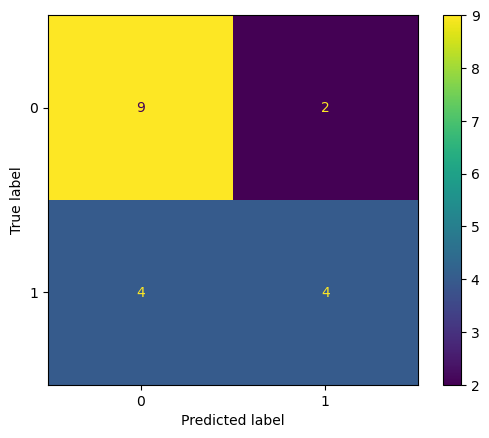

In [108]:
cm = confusion_matrix(couple_of_true_y, couple_of_pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()